In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
train1 = pd.read_table("train.tsv")

In [4]:
train1.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,CREATETIME
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000832,0.050000,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,2015-09-14
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.002801,0.033333,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,2015-09-14
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-09-14
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-10-16
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.002801,0.050000,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,2015-10-16


In [5]:
train2 = pd.read_table('train_id.tsv')

In [6]:
train2.head()

,PERSONID,LABEL
0,8ba94305557a4ec72435a9eb78001350,0
1,505d2a4db5dd353b775b5a30a731c02d,0
2,737f6cee33b47a3857b65186f5f6251e,0
3,3933908961f8e1780ff0b87cc5e4401d,0
4,c15b755463ae71dd54fa4b39d95f5170,0


In [7]:
test = pd.read_table('test_A.tsv')

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232502 entries, 0 to 232501
Data columns (total 55 columns):
PERSONID      232502 non-null object
APPLYNO       232502 non-null object
FTR0          232502 non-null float64
FTR1          232502 non-null float64
FTR2          232502 non-null float64
FTR3          232502 non-null float64
FTR4          232502 non-null float64
FTR5          232502 non-null float64
FTR6          232502 non-null float64
FTR7          232502 non-null float64
FTR8          232502 non-null float64
FTR9          232502 non-null float64
FTR10         232502 non-null float64
FTR11         232502 non-null float64
FTR12         232502 non-null float64
FTR13         232502 non-null float64
FTR14         232502 non-null float64
FTR15         232502 non-null float64
FTR16         232502 non-null float64
FTR17         232502 non-null float64
FTR18         232502 non-null float64
FTR19         232502 non-null float64
FTR20         232502 non-null float64
FTR21         232

In [55]:
test['PERSONID'].nunique()

2500

In [8]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368146 entries, 0 to 1368145
Data columns (total 55 columns):
PERSONID      1368146 non-null object
APPLYNO       1368146 non-null object
FTR0          1368146 non-null float64
FTR1          1368146 non-null float64
FTR2          1368146 non-null float64
FTR3          1368146 non-null float64
FTR4          1368146 non-null float64
FTR5          1368146 non-null float64
FTR6          1368146 non-null float64
FTR7          1368146 non-null float64
FTR8          1368146 non-null float64
FTR9          1368146 non-null float64
FTR10         1368146 non-null float64
FTR11         1368146 non-null float64
FTR12         1368146 non-null float64
FTR13         1368146 non-null float64
FTR14         1368146 non-null float64
FTR15         1368146 non-null float64
FTR16         1368146 non-null float64
FTR17         1368146 non-null float64
FTR18         1368146 non-null float64
FTR19         1368146 non-null float64
FTR20         1368146 non-null 

In [9]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
PERSONID    15000 non-null object
LABEL       15000 non-null int64
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


In [10]:
train = train1.merge(train2, left_on='PERSONID', right_on='PERSONID')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368146 entries, 0 to 1368145
Data columns (total 56 columns):
PERSONID      1368146 non-null object
APPLYNO       1368146 non-null object
FTR0          1368146 non-null float64
FTR1          1368146 non-null float64
FTR2          1368146 non-null float64
FTR3          1368146 non-null float64
FTR4          1368146 non-null float64
FTR5          1368146 non-null float64
FTR6          1368146 non-null float64
FTR7          1368146 non-null float64
FTR8          1368146 non-null float64
FTR9          1368146 non-null float64
FTR10         1368146 non-null float64
FTR11         1368146 non-null float64
FTR12         1368146 non-null float64
FTR13         1368146 non-null float64
FTR14         1368146 non-null float64
FTR15         1368146 non-null float64
FTR16         1368146 non-null float64
FTR17         1368146 non-null float64
FTR18         1368146 non-null float64
FTR19         1368146 non-null float64
FTR20         1368146 non-null 

In [56]:
train.head()

,PERSONID,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,FTR8,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,LABEL
0,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000832,0.050000,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,0
1,8ba94305557a4ec72435a9eb78001350,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,0.0,...,0.002801,0.033333,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,0
2,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,0
3,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,0
4,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,0.0,...,0.002801,0.050000,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,0


# EDA

#### 发现这是一个样本不平衡数据,正负样本比例接近10:1

In [57]:
train.LABEL.value_counts()

0    1237747
1     130399
Name: LABEL, dtype: int64

In [59]:
train.LABEL.value_counts()[1]/train.LABEL.shape

array([0.09531073])

In [60]:
train.head()

,PERSONID,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,FTR8,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,LABEL
0,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000832,0.050000,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,0
1,8ba94305557a4ec72435a9eb78001350,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,0.0,...,0.002801,0.033333,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,0
2,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,0
3,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,0
4,8ba94305557a4ec72435a9eb78001350,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,0.0,...,0.002801,0.050000,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,0


#### 可以发现欺诈者的申请记录普遍比较高，可以对申请的次数做一个分箱

In [65]:
train.groupby('PERSONID')['LABEL'].agg(['sum', 'count']).sort_values('sum', ascending=False)

,sum,count
PERSONID,,
263610435a27ba386f61d06a8a05cfaf,1415,1415
d344bea5132a4e88127e4a31aba29c41,992,992
0d8ce23eafab96beb9ad507252184999,866,866
616c5be992e4296f9eb37d5f7a8a6876,845,845
4ce604bd5b742174eedfb083e7209de4,843,843
3cfef57374c79f033673fcbbb28440b0,819,819
be0fcf428b80145c402d3f70898e465a,812,812
66a513943c56c65640b50ee16ecc1fc0,786,786
92e3269d23d04128c641cf9c25c0c0b6,765,765


In [67]:
train.groupby('PERSONID')['LABEL'].agg(['sum', 'count']).sort_values('count', ascending=False)

,sum,count
PERSONID,,
263610435a27ba386f61d06a8a05cfaf,1415,1415
d344bea5132a4e88127e4a31aba29c41,992,992
f91cfe1d586dee2170eabd5778ef3588,0,945
0d8ce23eafab96beb9ad507252184999,866,866
616c5be992e4296f9eb37d5f7a8a6876,845,845
4ce604bd5b742174eedfb083e7209de4,843,843
3cfef57374c79f033673fcbbb28440b0,819,819
be0fcf428b80145c402d3f70898e465a,812,812
66a513943c56c65640b50ee16ecc1fc0,786,786


In [71]:
apply_count = train.groupby('PERSONID')['LABEL'].count().to_frame()

In [73]:
apply_count.columns = ['apply_count']

In [77]:
train.merge(apply_count, left_on='PERSONID', right_index=True, how='left')

TypeError: merge() got an unexpected keyword argument 'inplace'

In [15]:
import pandas_profiling as pp

/home/dax/soft/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/dax/soft/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/dax/soft/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/dax/soft/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/dax/soft/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/dax/soft/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line

In [16]:
pp.ProfileReport(train)

Number of variables,56
Number of observations,1368146
Total Missing (%),0.0%
Total size in memory,595.0 MiB
Average record size in memory,456.0 B
Numeric,39
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,12


In [17]:
FTR29_cut = pd.cut(train['FTR29'], 4)

In [18]:
train.FTR29.value_counts().head(10)

0.000000    1269165
0.000015       4486
0.000030       4000
0.002359       3506
0.000075       3426
0.002191       2900
0.000057       2242
0.000018       2079
0.001180       2024
0.000024       1970
Name: FTR29, dtype: int64

/home/dax/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


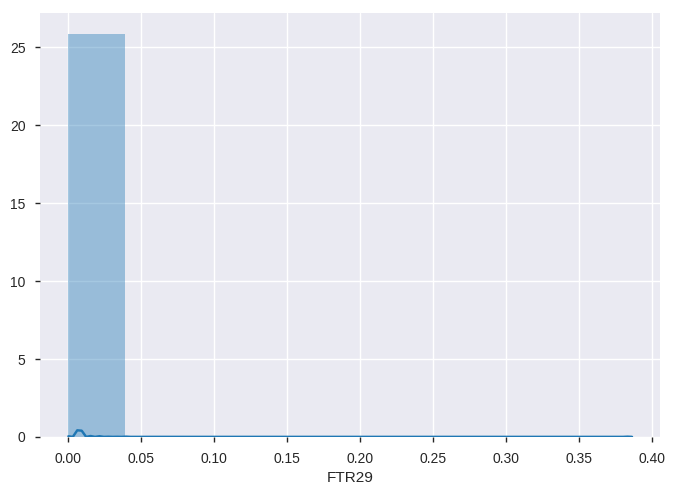

In [19]:
sns.distplot(train.FTR29, bins=10, hist=True)

In [20]:
label_p_rate = train.LABEL.value_counts()[1]/train.shape[0]
label_p_rate

0.09531073438068745

In [21]:
def get_label_p_rate(label, threshold=0, data=train):
    data_filter = data[data[label]>threshold]
    return data_filter['LABEL'].sum()/data_filter.shape[0]

In [22]:
get_label_p_rate('FTR29', 0.01, train)

0.10810810810810811

In [23]:
drop_cols = ['APPLYNO', 'CREATETIME']
train.drop(drop_cols, inplace=True, axis=1)

#### 不平衡数据处理

In [24]:
def get_balance_data():
    index_0 = train[train['LABEL']==0].index
    index_1 = train[train['LABEL']==1].index
    index_0_choice = np.random.choice(index_0, len(index_1))
    return train.iloc[np.hstack((index_0_choice, index_1)), :]

In [25]:
train_ = get_balance_data()

train_.reset_index(inplace=True, drop=True)

In [26]:
train_.head()

,PERSONID,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,FTR8,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,LABEL
0,a15df5a70aace536db7950785c9ffb19,0.05,0.0,0.000381,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.05,0.0,0.0,0.000013,0.05,0.0,0.0,"A0B0C7E0D0,A0B0C41E5D3",0
1,c154e124956dd641175e6dda45cfb99e,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.05,0.0,0.0,0.000050,0.05,0.0,0.0,"A0B0C2E4D1,A0B0C0E0D0",0
2,7be25b6a5b8b9438a50f43fdd6abee95,0.05,0.0,0.000000,0.0,0.000047,0.0,0.0,0.000047,0.0,...,0.000000,0.05,0.0,0.0,0.000096,0.05,0.0,0.0,"A0B0C14E0D0,A0B0C2E1D1",0
3,7c5e256314c5f9ffcdba92b82d908727,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000643,0.05,0.0,0.0,0.000000,0.05,0.0,0.0,"A41B188C235E0D0,A2B94C73E0D0",0
4,90a1f9cce12ed116d3f5b0103cd5b83e,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.05,0.0,0.0,0.000058,0.05,0.0,0.0,A0B0C14E0D0,0


## 训练模型，预测

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,1:-2], train['LABEL'])
x_train, x_test, y_train, y_test = train_test_split(train_.iloc[:,1:-2], train_['LABEL'])

#### 随机森林模型

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_rfc = RandomForestClassifier(n_estimators=150, max_depth=6, min_samples_split=10, random_state=10)
model_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [31]:
rfc_pred = model_rfc.predict(x_test)

In [32]:
model_rfc_list = [RandomForestClassifier(n_estimators=150, max_depth=6, min_samples_split=10, random_state=10)]*10

In [33]:
for i in range(10):
    train_ = get_balance_data()
    train_.reset_index(inplace=True, drop=True)
    x_train, x_test, y_train, y_test = train_test_split(train_.iloc[:,1:-2], train_['LABEL'])
    model_rfc_list[i].fit(x_train,y_train)

In [34]:
rfc_pred_list = [model_rfc_list[i].predict(x_test) for i in range(10)]

In [35]:
rfc_pred = [0 if x<7 else 1 for x in np.sum(rfc_pred_list, axis=0)]

#### 评价指标

In [36]:
from sklearn.metrics import accuracy_score, recall_score, auc, precision_score

In [37]:
rfc_acc = accuracy_score(y_test, rfc_pred)
print("accuracy is :{0}".format(rfc_acc))

accuracy is :0.7195245398773006


In [38]:
rfc_recall = recall_score(y_test, rfc_pred)
print('recall is {}'.format(rfc_recall))

recall is 0.6111943722281694


#### xgb模型

In [42]:
import xgboost as xgb

In [43]:
model_xgb = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=1000, subsample=0.7)

In [44]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [45]:
xgb_pred = model_xgb.predict(x_test)

/home/dax/soft/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [46]:
accuracy_score(y_test, xgb_pred)

0.7896472392638036

In [47]:
recall_score(y_test, xgb_pred)

0.7525615537543967

In [51]:
from sklearn import metrics
from sklearn.metrics import auc,roc_curve

In [52]:
fpr,tpr, thred = roc_curve(y_test, xgb_pred)
auc(fpr, tpr)

0.7897556269002717

#### 线性xgb

In [ ]:
model_lxgb = xgb.XGBRegressor(max_depth=6, learning_rate=0.05, n_estimators=3000, subsample=0.5)

In [ ]:
model_lxgb.fit(x_train, y_train)

In [ ]:
lxgb_pred = model_lxgb.predict(x_test)

In [ ]:
lxgb_pred = np.round(lxgb_pred)

In [ ]:
accuracy_score(y_test, lxgb_pred)

In [ ]:
recall_score(y_test, lxgb_pred)